In [12]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [22]:
class LinUCB:
    def __init__(self, T, d, k, alpha, theta):
        self.time_horizon = T
        self.context_dim = d
        self.arm_count = k
        self.alpha = alpha
        self.theta = theta
        self.A = np.zeros((self.arm_count, self.context_dim, self.context_dim)) + np.eye(self.context_dim)
        self.A_inverse = np.zeros_like(self.A)
        self.b = np.zeros((self.arm_count, self.context_dim, 1))
        self.theta_hat = np.zeros((self.arm_count, self.context_dim, 1))
        self.p_curr = np.zeros((self.arm_count))
        self.total_reward = 0
        self.arm_sample_count = np.zeros(self.arm_count)
        self.reward_history = []
        self.regret_history = []
        
    def update(self, arm, context, reward):
        self.A[arm] += np.dot(context, context.T)
        self.b[arm] += reward*context
    
    def play(self):
        for t in range(self.time_horizon):
            contexts = np.random.uniform(0, (1.0/float(self.context_dim)), (self.arm_count, self.context_dim, 1))  # L1 norm between 0 and 1
            for a in range(self.arm_count):
                self.A_inverse[a] = inv(self.A[a])
            for a in range(self.arm_count):
                self.theta_hat[a] = np.dot(self.A_inverse[a],self.b[a])
                self.p_curr[a] = np.dot(self.theta_hat[a].T, contexts[a]) + self.alpha*np.sqrt(np.dot(np.dot(contexts[a].T, self.A_inverse[a]), contexts[a]))
            curr_arm = np.argmax(self.p_curr)
            curr_reward = np.random.normal(loc=float(np.dot(self.theta[curr_arm].T, contexts[a])), scale=0.01)
            self.update(curr_arm, contexts[a], curr_reward)
            self.total_reward += curr_reward
            self.arm_sample_count[curr_arm] += 1
            self.reward_history.append(self.total_reward)
            if(len(self.regret_history)==0):
                curr_regret = float(np.max(np.sum(np.sum(self.theta*contexts, axis=2), axis=1)) - curr_reward)
                self.regret_history.append(curr_regret)
            else:
                curr_regret = float(np.max(np.sum(np.sum(self.theta*contexts, axis=2), axis=1)) - curr_reward)
                self.regret_history.append(self.regret_history[-1] + curr_regret)

In [23]:
theta = np.random.uniform(0, 0.2, size=(10, 5, 1))
player = LinUCB(100000, 5, 10, 10.0, theta)
player.play()

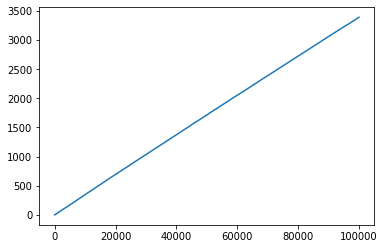

In [24]:
plt.plot(player.regret_history)

In [25]:
print(player.arm_sample_count)

[ 8617. 10250.  9004. 10297.  9661. 10890. 11525. 11813. 10970.  6973.]
